In [ ]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 32
learning_rate = 0.001 ## 0.001
N_Epochs      = 1000

epsilon = 0.0001

In [ ]:
path_data = '/content/drive/MyDrive/digital_habits_vs_mental_health.csv'

IMH_raw_data = pd.read_csv( path_data, delimiter="," )

In [ ]:
IMH_raw_data

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10
...,...,...,...,...,...,...
99995,5.0,4,1.8,4.5,10,9
99996,6.4,3,3.1,5.4,10,5
99997,3.7,3,1.5,8.3,4,10
99998,10.6,2,5.3,7.2,9,9


In [ ]:
headers_list = IMH_raw_data.columns.values.tolist()

headers_list

['screen_time_hours',
 'social_media_platforms_used',
 'hours_on_TikTok',
 'sleep_hours',
 'stress_level',
 'mood_score']

In [ ]:
headers_list2 = [ 'screen time hours','social media platforms used','hours on TikTok','sleep hours','stress level','mood score'  ]

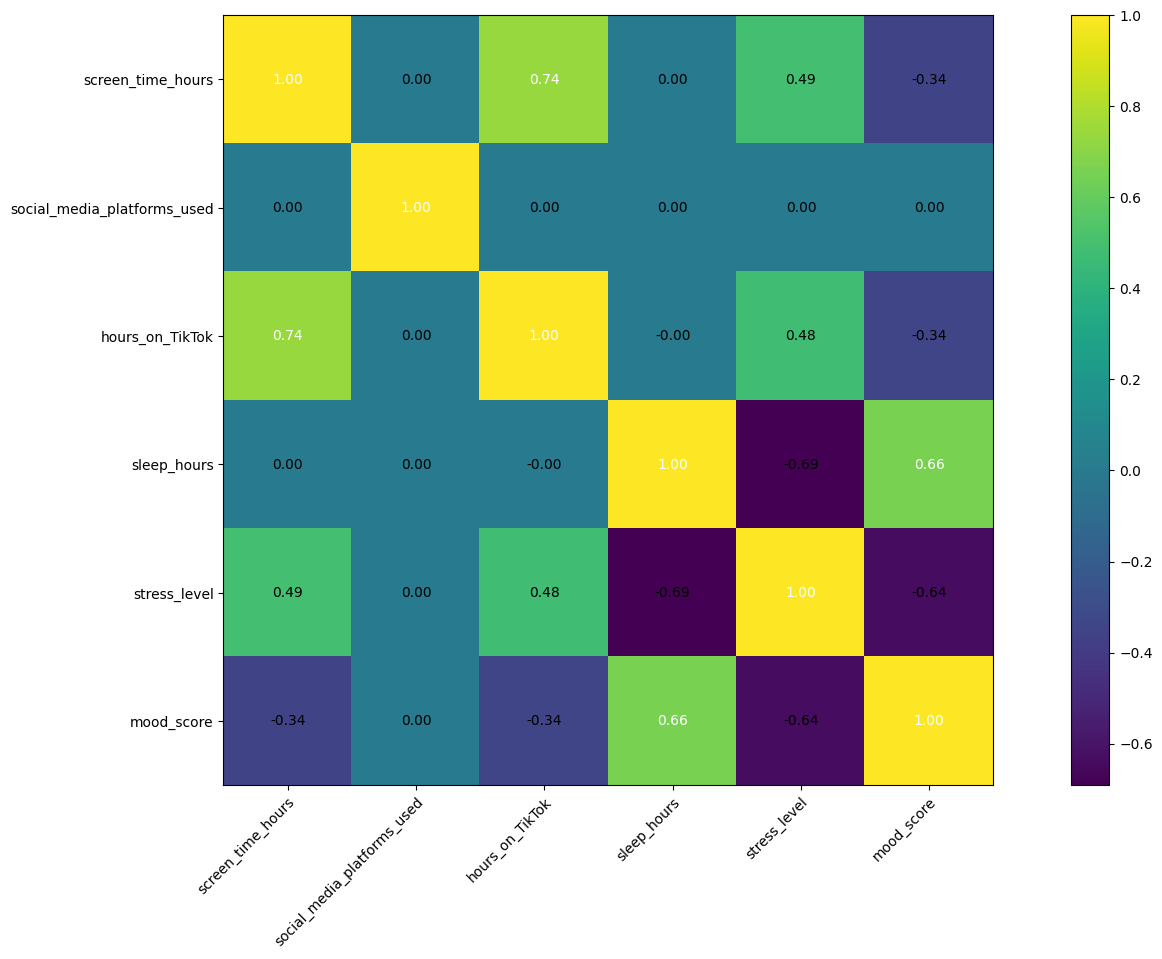

In [ ]:
cm = np.corrcoef(   IMH_raw_data[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
plt.show()

In [ ]:
IMH_raw_data_np = IMH_raw_data.to_numpy()

In [ ]:
IMH_raw_data_np

array([[10.3,  2. ,  5.3,  4.4, 10. ,  5. ],
       [ 6.5,  5. ,  3.5,  6.2,  8. ,  8. ],
       [ 9.1,  4. ,  2.8,  6.6,  7. ,  8. ],
       ...,
       [ 3.7,  3. ,  1.5,  8.3,  4. , 10. ],
       [10.6,  2. ,  5.3,  7.2,  9. ,  9. ],
       [ 5.4,  4. ,  2.2,  7.4,  5. , 10. ]])

In [ ]:
IMH_raw_data_np.shape

(100000, 6)

In [ ]:
x = IMH_raw_data_np[ :, :-1]
y = IMH_raw_data_np[ :,4:5]

In [ ]:
x

array([[10.3,  2. ,  5.3,  4.4, 10. ],
       [ 6.5,  5. ,  3.5,  6.2,  8. ],
       [ 9.1,  4. ,  2.8,  6.6,  7. ],
       ...,
       [ 3.7,  3. ,  1.5,  8.3,  4. ],
       [10.6,  2. ,  5.3,  7.2,  9. ],
       [ 5.4,  4. ,  2.2,  7.4,  5. ]])

In [ ]:
y

array([[10.],
       [ 8.],
       [ 7.],
       ...,
       [ 4.],
       [ 9.],
       [ 5.]])

In [ ]:
y = y.astype(int)

In [ ]:
y

array([[10],
       [ 8],
       [ 7],
       ...,
       [ 4],
       [ 9],
       [ 5]])

In [ ]:
the_set = np.unique(y)

the_set

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
len(  the_set  )

10

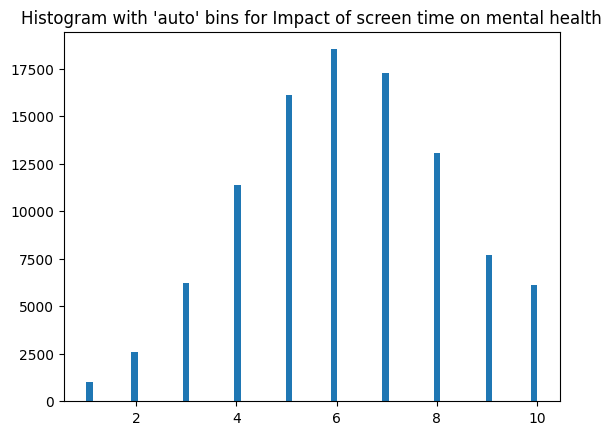

In [ ]:
_ = plt.hist(y, bins='auto')

plt.title("Histogram with 'auto' bins for Impact of screen time on mental health")

plt.show()

In [ ]:
print(x.shape)

print(y.shape)

(100000, 5)
(100000, 1)


In [ ]:
random_seed = int( random.random() * 100 )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_seed)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 5)
(20000, 5)
(80000, 1)
(20000, 1)


In [ ]:
x_test.dtype

dtype('float64')

In [ ]:
y_test.dtype

dtype('int64')

In [ ]:
## fix data type

x_train = x_train.astype(  np.float32  )
x_test  = x_test.astype(   np.float32  )
y_train = y_train.astype(  np.int64 )       ## np.long
y_test  = y_test.astype(   np.int64 )

In [ ]:
x_train_tr = torch.from_numpy(x_train)
x_test_tr  = torch.from_numpy(x_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [ ]:
x_means      = x_train_tr.mean(0, keepdim=True )

x_deviations = x_train_tr.std( 0, keepdim=True) + epsilon

In [ ]:
x_means

tensor([[6.0017, 2.9981, 2.4018, 6.9906, 6.1805]])

In [ ]:
x_deviations

tensor([[1.9887, 1.4125, 1.0807, 1.4665, 2.0454]])

In [ ]:
x_train.shape[0]

80000

In [ ]:

## label_map = {0:0, 2:1 }
## the_set = array([ 3,   4,   5,   6,   7,   8,   9   ])

label_map         = { 1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9 }
reverse_label_map = { 0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9, 9:10 }

In [ ]:
'''

for i in range( x_train.shape[0] ):
    print( y_train_tr[i].item()  )
    print(   label_map[ y_train_tr[i].item() ]    )



'''

'\n\nfor i in range( x_train.shape[0] ):\n    print( y_train_tr[i].item()  )\n    print(   label_map[ y_train_tr[i].item() ]    )\n\n\n\n'

In [ ]:
IMH_train_list = [  ( x_train_tr[i], label_map[ y_train_tr[i].item() ] )  for i in range( x_train.shape[0] ) ]

IMH_test_list  = [  ( x_test_tr[i],  label_map[ y_test_tr[i].item()  ] )  for i in range( x_test.shape[0] ) ]

In [ ]:
IMH_train_list[:3]

[(tensor([ 6.7000,  1.0000,  2.5000, 10.0000,  3.0000]), 2),
 (tensor([5.1000, 3.0000, 3.0000, 5.6000, 6.0000]), 5),
 (tensor([6.7000, 2.0000, 3.4000, 6.7000, 8.0000]), 7)]

In [ ]:
train_dl = torch.utils.data.DataLoader(IMH_train_list, batch_size=batch_size, shuffle=True)

In [ ]:
x_test.shape[0]

20000

In [ ]:
all_test_data = x_test.shape[0]

test_dl  = torch.utils.data.DataLoader(IMH_test_list,  batch_size=all_test_data, shuffle=True)

In [ ]:

train_dl

In [ ]:
## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(5, 16)
        self.act1    = nn.ReLU()   ## nn.Sigmoid()
        self.linear2 = nn.Linear(16, 10) # Changed from 7 to 10 to match 10 output classes
        self.act2    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)


    ## perform inference
    def forward(self, x):

        ## x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        ## x      = self.dropout(x)
        x      = self.linear2(x)
        y_pred = self.act2(x)

        return y_pred

In [ ]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):

    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(5, 64)  # Changed from 6 to 5 to match input features
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(64, 32)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(32, 10) # Changed from 7 to 10 to match 10 output classes
        # self.act3    = nn.Softmax(dim=1) # Removed Softmax
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        x      = self.dropout(x)
        x      = self.linear2(x)
        x      = self.act2(x)
        x      = self.dropout(x)
        y_pred = self.linear3(x) # Output raw logits

        return y_pred

In [ ]:
def training_loop(epochs, model, loss_fn, optimizer):
    for epoch in range(500):
        for xb, yb in train_dl:
            y_pred = model(xb)
            loss = loss_fn(y_pred, yb.squeeze(1)) # Squeeze yb to make it 1D

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

In [ ]:
model      = MLP_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )

Epoch 0, Loss: 2.0898
Epoch 50, Loss: 1.7668
Epoch 100, Loss: 1.7657
Epoch 150, Loss: 1.7622
Epoch 200, Loss: 1.9173
Epoch 250, Loss: 1.7969
Epoch 300, Loss: 1.8282
Epoch 350, Loss: 1.6128
Epoch 400, Loss: 1.8838
Epoch 450, Loss: 1.8282


In [ ]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [ ]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.63
Confusion Matrix:
[[   0    0    0  208    0    0    0    0    0    0]
 [   0    0    0  499    0    0    0    0    0    0]
 [   0    0    0 1250    0    0    0    0    0    0]
 [   0    0    0 2323    0    0    0    0    0    0]
 [   0    0    0    0 3225    0    0    0    0    0]
 [   0    0    0    0    0 3696    0    0    0    0]
 [   0    0    0    0    0    0 3406    0    0    0]
 [   0    0    0    0    0    0 2647    0    0    0]
 [   0    0    0    0    0    0 1507    0    0    0]
 [   0    0    0    0    0    0 1239    0    0    0]]
Precision: 0.475
Recall: 0.632
F1-measure: 0.523


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def training_loop(epochs, model, loss_fn, optimizer):
    for epoch in range(500):
        for xb, yb in train_dl:
            y_pred = model(xb)
            # Original yb.squeeze(1) contains values from 1 to 10
            # We need to map them to 0 to 9 for CrossEntropyLoss
            mapped_yb = torch.tensor([label_map[item.item()] for item in yb.squeeze(1)]).to(yb.device)
            loss = loss_fn(y_pred, mapped_yb) # Use the mapped labels

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

model      = DL_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )

Epoch 0, Loss: 0.0545
Epoch 50, Loss: 0.0002
Epoch 100, Loss: 0.0004
Epoch 150, Loss: 0.0006
Epoch 200, Loss: 0.0010
Epoch 250, Loss: 0.0022
Epoch 300, Loss: 0.0007
Epoch 350, Loss: 0.0031
Epoch 400, Loss: 0.0005
Epoch 450, Loss: 0.0009


In [ ]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.08
Confusion Matrix:
[[   1    3   13    7    5    1    0  177    1    0]
 [   0   10   22   15   19    5    0  416   12    0]
 [   0   22   99   37   25   14    0 1033   19    1]
 [   0   46  180   97   30   16    0 1910   39    5]
 [   0   39  310  164   44   18    0 2570   46   34]
 [   0   50  457  253   33    5    0 2730   42  126]
 [   0   23  471  463   15    3    0 2142   37  252]
 [   0   26  434  616    9    1    0 1343   18  200]
 [   0   14  306  471   10    2    0  578    8  118]
 [   0   14  295  481   12    1    0  336    8   92]]
Precision: 0.090
Recall: 0.085
F1-measure: 0.042


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
